In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
files_path = '/home/juliacnc/code/Juliacnc/Mushrooms/images'

In [3]:
images_path = []
for root, dirs, files in os.walk(files_path):
    for file in files:
        image_path = os.path.join(root, file)
        images_path.append(image_path)

In [4]:
mushroom =[]
for text in images_path :
    mushroom.append(text.split('/')[7])

In [5]:
images=[]

for image in images_path :
    with Image.open(image) as img:
        img = img.resize((224,224))
        im = np.asarray(img)
        images.append(Image.fromarray(im))


The image resizing is pretty important. The principal reason is because the hardware had some difficulties to conserve the original size of images (512,512,3). The second one is because when the images are showing, it seems there are no differences between size (512,512) and (224,224).

Noted, even if there are no differences between the both size with the naked eye, the reduction size could masked the texture variations,  subtle patterns or specific characteristics.

In [6]:
df = pd.DataFrame({'images_path':images_path, 'mushroom':mushroom, 'images':images})
df.head()

,images_path,mushroom,images
0,/home/juliacnc/code/Juliacnc/Mushrooms/images/...,beefsteak_fungus,<PIL.Image.Image image mode=RGBA size=224x224 ...
1,/home/juliacnc/code/Juliacnc/Mushrooms/images/...,beefsteak_fungus,<PIL.Image.Image image mode=RGBA size=224x224 ...
2,/home/juliacnc/code/Juliacnc/Mushrooms/images/...,beefsteak_fungus,<PIL.Image.Image image mode=RGBA size=224x224 ...
3,/home/juliacnc/code/Juliacnc/Mushrooms/images/...,beefsteak_fungus,<PIL.Image.Image image mode=RGBA size=224x224 ...
4,/home/juliacnc/code/Juliacnc/Mushrooms/images/...,beefsteak_fungus,<PIL.Image.Image image mode=RGBA size=224x224 ...


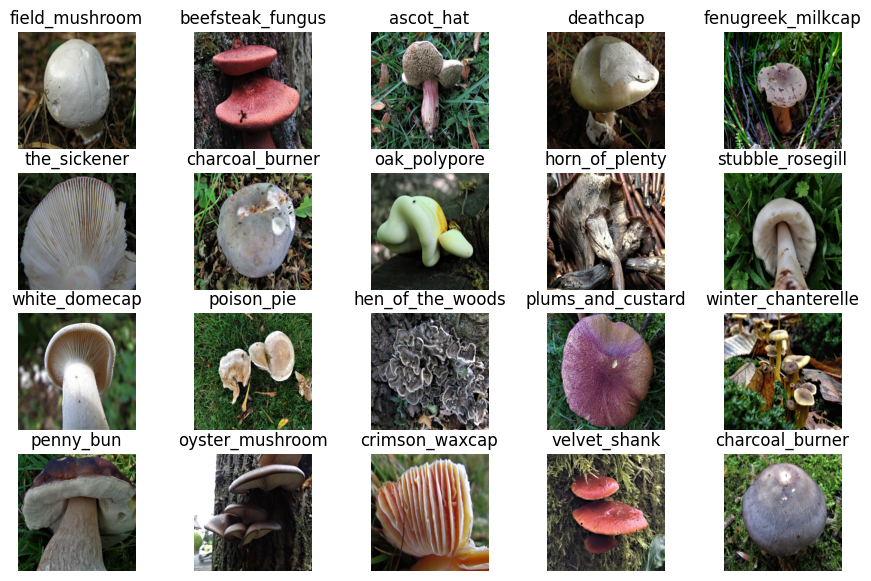

In [7]:
fig, axs = plt.subplots(4, 5, figsize=(11, 7))

for row in range(4):
    for col in range(5):
        indice = np.random.randint(df.shape[0])
        axs[row, col].imshow(df.images[indice])
        axs[row, col].set_title(df.mushroom[indice])
        axs[row, col].axis('off')

In [8]:
print('Maximum images per mushroom types :{}, concern {}'.format(df.mushroom.value_counts().max(), [key for key, value in df.mushroom.value_counts().items() if value == 16]))
print('Minimum images per mushroom types :{}, concern {}'.format(df.mushroom.value_counts().min(), [key for key, value in df.mushroom.value_counts().items() if value == 4]))
print('Most common count : {}, represent {} mushroom types on {} total mushroom types'.format(df.mushroom.value_counts().mode().values[0],
                                                                  df.mushroom.value_counts()[df.mushroom.value_counts()==df.mushroom.value_counts().mode().values[0]].shape[0],
                                                                                              len(df.mushroom.unique())))
print('Number of mushroom type under the most commom count : {}'.format(df.mushroom.value_counts()[df.mushroom.value_counts()<df.mushroom.value_counts().mode().values[0]].shape[0]))
print('Number of mushroom type above the most commom count : {}'.format(df.mushroom.value_counts()[df.mushroom.value_counts()>df.mushroom.value_counts().mode().values[0]].shape[0]))

Maximum images per mushroom types :16, concern ['deadly_fibrecap']
Minimum images per mushroom types :4, concern ['truffles']
Most common count : 15, represent 189 mushroom types on 215 total mushroom types
Number of mushroom type under the most commom count : 25
Number of mushroom type above the most commom count : 1


In [9]:
grouped = df.groupby('mushroom')

average_images = {}
for key, group in grouped:
    images = [np.array(Image.open(path)) for path in group['images_path']] 
    average_image = np.mean(images, axis=0).astype(np.uint8)
    average_images[key] = average_image

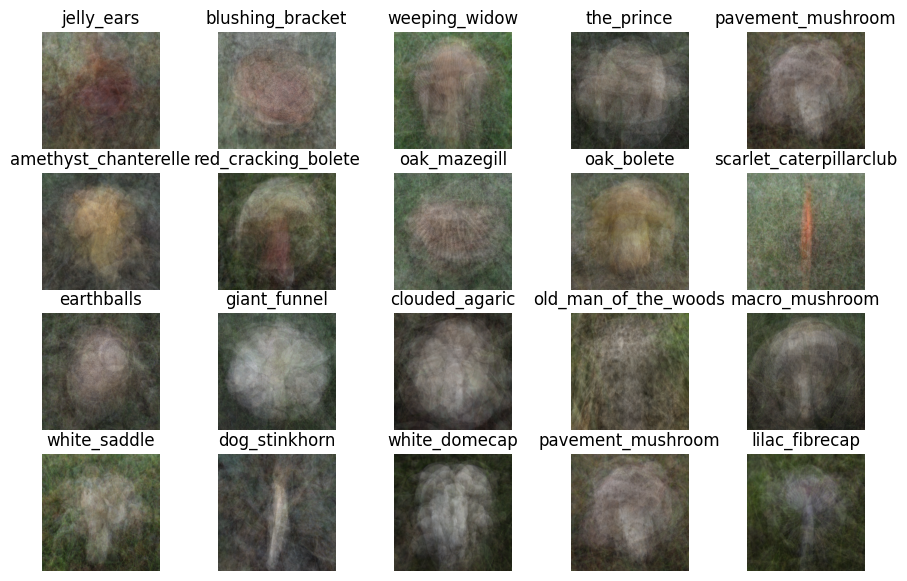

In [80]:
fig, axs = plt.subplots(4, 5, figsize=(11, 7))

for row in range(4):
    for col in range(5):
        indices = list(np.random.choice(list(average_images.keys()), 12))
        for i in indices :
            image=average_images[i]
            img = Image.fromarray(image)
            axs[row, col].imshow(img)
            axs[row, col].set_title(i)
            axs[row, col].axis('off')